In [94]:
import numpy as np
from scipy import stats
import itertools
import math
import matplotlib.pyplot as plt

In [95]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
[rng() for _ in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

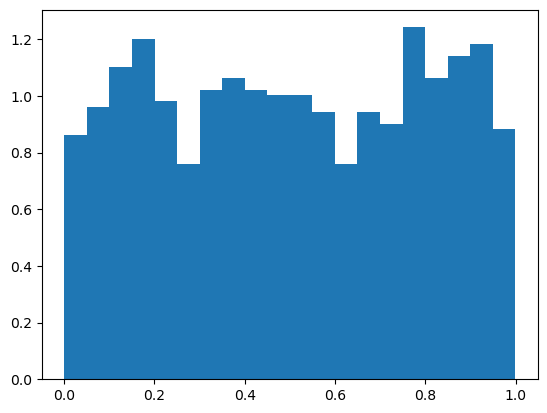

Равномерное: KstestResult(statistic=0.026368738710880302, pvalue=0.48207388563860043)
Нормальное: KstestResult(statistic=0.500866322716208, pvalue=1.4724733582412854e-232)


In [96]:
samples = [rng() for _ in range(1000)]
samples

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, bins=20, density=True)
plt.show()

print('Равномерное:', stats.kstest(samples, stats.uniform.cdf))
print('Нормальное:', stats.kstest(samples, stats.norm.cdf))

In [97]:
k = 20
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

f_obs, f_exp, stats.chisquare(f_obs, f_exp)

(array([42, 49, 55, 60, 49, 38, 51, 53, 51, 50, 50, 47, 38, 47, 45, 65, 50,
        60, 56, 44], dtype=int64),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50]),
 Power_divergenceResult(statistic=18.599999999999998, pvalue=0.48275240319942647))

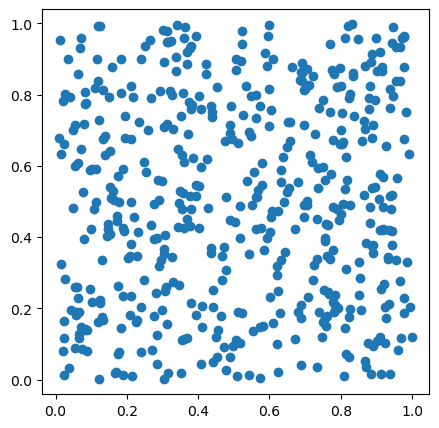

In [98]:
fig = plt.figure(figsize=(5, 5))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(samples[::2], samples[1::2])
plt.axis('equal')
plt.show()

# №1

In [99]:
def serial_test(m, n, samples):
    f_obs = np.histogram2d(samples[::2], samples[1::2], bins=[m, n])
    f_exp = np.full(m*n, len(samples)//(2*m*n))
    return stats.chisquare(f_obs[0].flatten(), f_exp)
    
serial_test(5, 20, samples)

Power_divergenceResult(statistic=83.2, pvalue=0.8730218871062729)

# №2

In [100]:
def permutation_test(d, samples):
    f_obs=np.zeros(math.factorial(d))
    for j in range(d, len(samples)+1, d):
        n = 0
        for i in itertools.permutations(sorted(samples[j-d:j])):
            if samples[j-d:j] == list(i):
                f_obs[n]+=1
                break
            n+=1
    f_exp=np.full(math.factorial(d), len(samples)//(math.factorial(d)*d))
    print(f_obs)
    print(f_exp)
    print(stats.chisquare(f_obs, f_exp))

permutation_test(2, samples)
permutation_test(3, samples[:-10])

[249. 251.]
[250 250]
Power_divergenceResult(statistic=0.008, pvalue=0.9287300745648026)
[54. 69. 52. 46. 56. 53.]
[55 55 55 55 55 55]
Power_divergenceResult(statistic=5.309090909090909, pvalue=0.37933391191130156)


In [101]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

# №3

In [102]:
k = 1000

random = [rng_bad() for _ in range(30000)]
f_obs = np.histogram(random, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(random) // k)

print(stats.chisquare(f_obs, f_exp))

samples = [rng() for _ in range(30000)]
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

print(stats.chisquare(f_obs, f_exp))

Power_divergenceResult(statistic=959.7333333333333, pvalue=0.8092905674594509)
Power_divergenceResult(statistic=975.1999999999999, pvalue=0.6990929200492947)


# №4

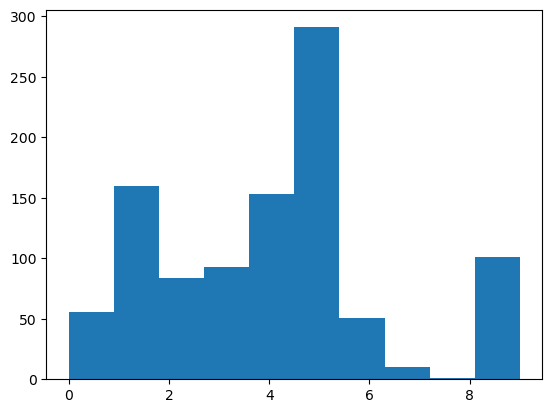

In [103]:
p=[0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

def discr(a, n):
    b = []
    c = []
    a=np.array(a)/sum(a)
    for i in range(len(a)+1):
        b.append(sum(a[:i]))
    r = np.random.rand(n)
    for i in r:
        for j in range(len(b)-1):
            if i >= b[j] and i < b[j+1]:
                c.append(j)
                break
    return c

arr = discr(p, 1000)
fig, ax = plt.subplots()
ax.hist(arr, 10)
plt.show()

# №5

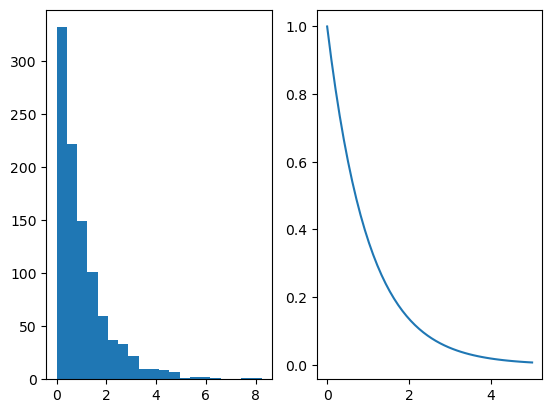

In [104]:
def exp_p(a, n):
    r = np.random.rand(n)
    return np.vectorize(lambda x: (-1/a)*math.log(1-x))(r)

arr=exp_p(1, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(arr, 20)
X = np.linspace(0, 5, 50)
C = np.exp(-X)
ax2.plot(X, C)
plt.show()

# №6

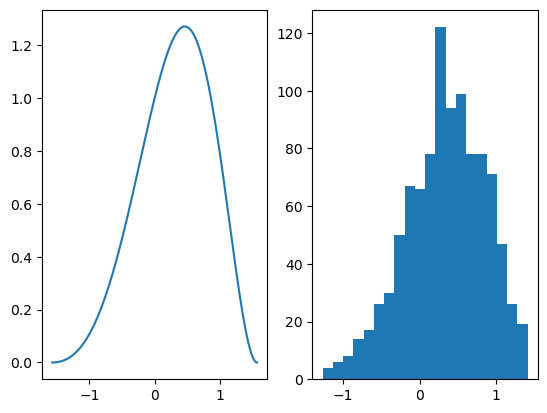

In [156]:
def F(x):
    return 2.5*(1/((2*np.pi*(v**2))**0.5))*math.exp(-((x-m)**2)/(2*(v**2)))

E = 0.45
D = 0.75
X = np.linspace(-np.pi/2, np.pi/2, 1000)
Y = np.exp(X)*np.cos(X)**2
i=0
sample=[]
while i<1000:
    s = np.random.normal(E, D)
    if abs(s)<= np.pi/2:
        if np.random.rand()*F(s)<=math.exp(s)*(np.cos(s)**2):
            sample.append(s)
            i+=1
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X, Y)
ax2.hist(sample, 20)
plt.show()

# №7

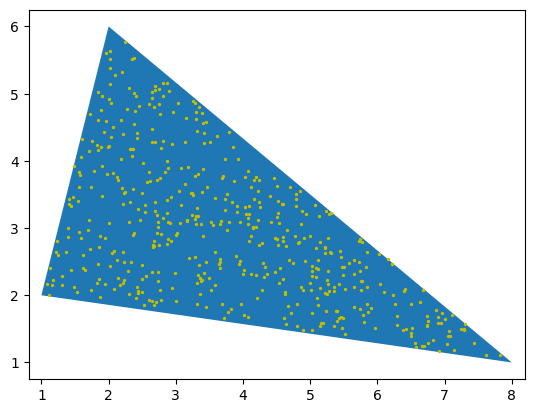

In [142]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
sample = np.random.rand(1000).reshape((-1,2))
for i in range(500):
    if sample[i][0]+sample[i][1]>1:
        sample[i][0]=1-sample[i][0]
        sample[i][1]=1-sample[i][1]
v1=np.array([7, -1])
c=np.array([1, 4])
points=[]
for i in range(500):
    points.append([1, 2]+v1*sample[i][0]+c*sample[i][1])
points=np.array(points)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(points[:,0], points[:,1], s=2 ,c='y')
plt.axis('equal')
plt.show()

# №8

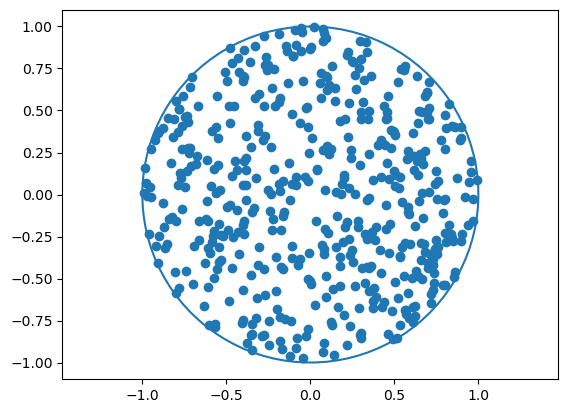

In [153]:
def circle(n):
    p=[]
    for i in range(n):
        a = 2*math.pi*np.random.rand()
        r = math.sqrt(np.random.rand())
        p.append(r * math.cos(a)) 
        p.append(r * math.sin(a))
    return p  

points = circle(500)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(points[::2], points[1::2])
plt.show()

# №9

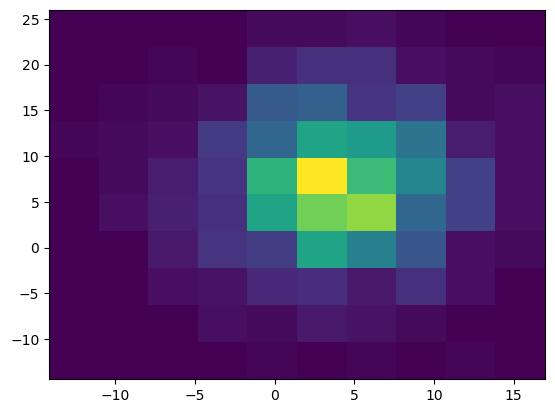

E:
 [3.91683964 7.09738935]
Cov:
 [[20.83470767 -3.99376431]
 [-3.99376431 40.83287472]]


In [171]:
def BM(n):
    l=[]
    i=0
    while i <n:
        x = 2*np.random.rand()-1
        y = 2*np.random.rand()-1
        s = x**2+y**2
        if s>0 and s<=1:
            l.append(x*math.sqrt(-2*math.log(s)/s))
            l.append(y*math.sqrt(-2*math.log(s)/s))
            i+=1
    return l
v=1000
sample=np.array(BM(v)).reshape((-1,2))
a = np.array([[20, -4],[-4, 40]])
b = np.linalg.cholesky(a)
sample_=np.transpose(np.dot(b, np.transpose(sample)))+np.full((v, 2), [4, 7])
fig = plt.figure()
plt.hist2d(sample_[:,0], sample2[:,1])
plt.show()
print("E:\n", np.mean(sample_, axis=0))
print("Cov:\n", np.cov(sample_, rowvar=False))